# P2 submission

More info on the dataset [here](https://github.com/epfl-dlab/when_sheep_shop/tree/master/data)

**Project proposal**

Best breweries in the world 

The idea behind the identification of the best breweries is that the consumer might be more interested to try new and/or original products that come from a good brewery. This ranking is based on the ratings given by the tasters, but the ratings have to be weighted by the number of ratings for the best beers, the quality and emotions transmitted in the text following the different ratings. Some ratings might be biased or unclear so some of them might have to be filtered. Once the ranking is determined a visualisation is to be created to convey properly the attributes of the best breweries (number of “quality” beers, rankings by styles).

*Feedback*

Find and visualize the best breweries - clarity: 75 - creativity: 75 - feasibility: 75, using beer-level reviews as a proxy for brewery reviews is doable, yet will require detailed analysis. 

# Beer reviews EDA

This dataset consists of beer reviews from two Beer rating websites: BeerAdvocate and RateBeer, for a period of 17 years ranging from 2001 to 2017.

Metadata about users, beers, and breweries (CSV)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import spacy

In [2]:
websites = ['BeerAdvocate', 'RateBeer']

# BeerAdvocate & RateBeer

In [3]:
# BeerAdvocate
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# RateBeer
beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

In [4]:
def split_website(website):
    if website == 'BA':
        beers = beers_BA
        breweries = breweries_BA
        users = users_BA
    else:
        beers = beers_RB
        breweries = breweries_RB
        users = users_RB
    return beers, breweries, users

In [5]:
comparison_csv = pd.DataFrame(index = ['beers.csv','breweries.csv','users.csv'], columns = ['length BA', '# unique (based on ID) in BA', 'length RB', '# unique (based on ID) in RB', '# columns BA','# columns RB', '# columns in common'])
comparison_csv['length BA'] = [len(beers_BA), len(breweries_BA), len(users_BA)]
comparison_csv['length RB'] = [len(beers_RB), len(breweries_RB), len(users_RB)]

comparison_csv['# unique (based on ID) in BA'] = [len(beers_BA['beer_id'].unique()), len(breweries_BA['id'].unique()), len(users_BA['user_id'].unique())]
comparison_csv['# unique (based on ID) in RB'] = [len(beers_RB['beer_id'].unique()), len(breweries_RB['id'].unique()), len(users_RB['user_id'].unique())]

comparison_csv['# columns BA'] = [len(beers_BA.columns), len(breweries_BA.columns), len(users_BA.columns)]
comparison_csv['# columns RB'] = [len(beers_RB.columns), len(breweries_RB.columns), len(users_RB.columns)]

comparison_csv['# columns in common'] = [len(set(beers_BA.columns).intersection(set(beers_RB.columns))), 
                                        len(set(breweries_BA.columns).intersection(set(breweries_RB.columns))),
                                        len(set(users_BA.columns).intersection(set(users_RB.columns)))]
comparison_csv.head()

,length BA,# unique (based on ID) in BA,length RB,# unique (based on ID) in RB,# columns BA,# columns RB,# columns in common
beers.csv,280823,280823,442081,442081,15,14,12
breweries.csv,16758,16758,24189,24189,4,4,4
users.csv,153704,153704,70174,70120,6,5,5


In [6]:
beers_col_in_BA_not_in_RB = set(beers_BA.columns) - set(beers_BA.columns).intersection(set(beers_RB.columns))
beers_col_in_RB_not_in_BA = set(beers_RB.columns) - set(beers_BA.columns).intersection(set(beers_RB.columns))
print('Beers :')
print(f'columns in BA but not in RB: {beers_col_in_BA_not_in_RB}')
print(f'columns in RB but not in BA: {beers_col_in_RB_not_in_BA}')

users_col_in_BA_not_in_RB = set(users_BA.columns) - set(users_BA.columns).intersection(set(users_RB.columns))
users_col_in_RB_not_in_BA = set(users_RB.columns) - set(users_BA.columns).intersection(set(users_RB.columns))
print('Users :')
print(f'columns in BA but not in RB: {users_col_in_BA_not_in_RB}')
print(f'columns in RB but not in BA: {users_col_in_RB_not_in_BA}')

Beers :
columns in BA but not in RB: {'bros_score', 'nbr_reviews', 'ba_score'}
columns in RB but not in BA: {'style_score', 'overall_score'}
Users :
columns in BA but not in RB: {'nbr_reviews'}
columns in RB but not in BA: set()


## Comparison of beers

Questions :
- Do some beers have more ratings than others ?
- Do the websites have beers in common (look at the beer_id) ?

LINK beers-breweries-users:
- What are the styles of the beers in each website and each location ?
- What are the favorite styles of beers per country ? (look at the ratings)
- Are there some country better at making good beers ?
- **Is there a link between the people's tastes and the origin of the beers ? Does it change across countries ?**
- **Is there a link between the people's tastes and the style of the beers ? Does it change across countries ?**
- **Do some country prefer beers based on country or based on style ?**

In [7]:
beers_BA.head(1)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN


In [8]:
beers_RB.head(1)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.0,NaN,0,NaN


In [9]:
print(beers_BA.columns)
print(beers_RB.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')


## Comparison of breweries

Questions :
- What are the breweries location on each website ?
- Do the websites have breweries in common ?
- How many different beers each breweries produce ?
- Do some country produce more different kind of beers than others ? (link between location and variety of beers)

In [10]:
breweries_BA.head(1)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5


In [11]:
breweries_RB.head(1)

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3


In [12]:
print(f'Number of different locations in AB - RB : {len(breweries_BA["location"].unique())} - {len(breweries_RB["location"].unique())}')
print(f'Number of breweries in AB and RB (based on id) : {len(set(breweries_BA["id"]).intersection(set(breweries_RB["id"])))}')
print(f'Number of breweries in AB and RB (based on name) : {len(set(breweries_BA["name"]).intersection(set(breweries_RB["name"])))}')

Number of different locations in AB - RB : 297 - 267
Number of breweries in AB and RB (based on id) : 7094
Number of breweries in AB and RB (based on name) : 6003


## Comparison of users

Questions :
- where are users from on each website ?
- are they some users on both websites (look at the IDs) ?
- Is there more reviews on one website (look at nbr_ratings) ?
- Is there a link between the location and the number of ratings ?
- What is `joined` ?

In [13]:
users_BA.head(1)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"


In [14]:
users_RB.head(1)

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland


In [15]:
# sort group united states together
print(f'Number of users\' origin  in AB - RB : {len(users_BA["location"].unique())} - {len(users_RB["location"].unique())}')

print(f'Number of users in AB and RB (based on user_id) : {len(set(users_BA["user_id"]).intersection(set(users_RB["user_id"])))}')
print(f'Number of users in AB and RB (based on user_name) : {len(set(users_BA["user_name"]).intersection(set(users_RB["user_name"])))}')

Number of users' origin  in AB - RB : 195 - 223
Number of users in AB and RB (based on user_id) : 0
Number of users in AB and RB (based on user_name) : 4349


In [16]:
# fig, axs = plt.subplots(1,2)
# sns.histplot(users_BA['nbr_ratings'], ax = axs[0])
# axs[0].set_title("Distrib. nbr_ratings for users_BA")
# sns.histplot(users_RB['nbr_ratings'], ax = axs[1])
# axs[1].set_title("Distrib. nbr_ratings for users_RB")

# Match beer data

In [17]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,scores,scores
beers_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/beers.csv", header=1)
print(beers_matched.columns)
beers_matched.head(3)

Index(['abv', 'avg', 'avg_computed', 'avg_matched_valid_ratings', 'ba_score',
       'beer_id', 'beer_name', 'beer_wout_brewery_name', 'brewery_id',
       'brewery_name', 'bros_score', 'nbr_matched_valid_ratings',
       'nbr_ratings', 'nbr_reviews', 'style', 'zscore', 'abv.1', 'avg.1',
       'avg_computed.1', 'avg_matched_valid_ratings.1', 'beer_id.1',
       'beer_name.1', 'beer_wout_brewery_name.1', 'brewery_id.1',
       'brewery_name.1', 'nbr_matched_valid_ratings.1', 'nbr_ratings.1',
       'overall_score', 'style.1', 'style_score', 'zscore.1', 'diff', 'sim'],
      dtype='object')


,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,...,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff,sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0


In [18]:
# 1st line of csv : ba,ba,ba,ba,rb,rb,rb,rb,scores,scores
breweries_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/breweries.csv", header = 1)
print(set(breweries_matched.columns))
breweries_matched.head(2)

{'name.1', 'sim', 'name', 'nbr_beers.1', 'id', 'diff', 'location', 'location.1', 'nbr_beers', 'id.1'}


,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff,sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596


In [19]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
print(ratings_matched.columns)
ratings_matched.head()

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong


In [20]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,scores
users_approx = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users_approx.csv", header=1)
print(set(users_approx))
users_approx.head(3)

{'joined', 'user_name', 'user_id.1', 'sim', 'nbr_ratings', 'user_name_lower.1', 'user_id', 'user_name_lower', 'location', 'location.1', 'nbr_reviews', 'joined.1', 'nbr_ratings.1', 'user_name.1'}


,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1,sim
0,1.483009e+09,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1.484046e+09,Spain,89,442761,MAGICuenca91,magicuenca91,0.904534
1,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel,1.000000
2,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138,1.000000


In [21]:
print(len(users_approx['location'].unique()))
print(len(users_approx['location.1'].unique()))

111
111


In [22]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb
users_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users.csv", header=1)
print(set(users_matched.columns))
users_matched.head(2)

{'joined', 'user_name', 'user_id.1', 'nbr_ratings', 'user_name_lower.1', 'user_id', 'user_name_lower', 'location', 'location.1', 'nbr_reviews', 'joined.1', 'nbr_ratings.1', 'user_name.1'}


,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138


In [23]:
print(len(users_matched['location'].unique()))
print(len(users_matched['location.1'].unique()))

110
110


In [24]:
comparison_csv_matched = pd.DataFrame(index = ['beers.csv','breweries.csv','users.csv', 'users_approx','ratings'], columns = ['length', '# columns'])

comparison_csv_matched['length'] = [len(beers_matched), len(breweries_matched), len(users_matched), len(users_approx), len(ratings_matched)]
comparison_csv_matched['# columns'] = [len(beers_matched.columns), len(breweries_matched.columns), len(users_matched.columns), len(users_approx.columns), len(ratings_matched.columns)]

comparison_csv_matched.head()

,length,# columns
beers.csv,45640,33
breweries.csv,8281,10
users.csv,3020,13
users_approx,3341,14
ratings,21964,33


## Ideas

- preprocess all the locations
- is there a time dimension ? We could predict the evolution of tastes of consumers in the future (train a classifier/predictor) ?

## EDA textual reviews

NB : for BeerAdvocate, a review is a rating with a text of a least 150 characters. Therefore, the file reviews.txt.gz contains only the reviews while the file ratings.txt.gz contains all the ratings (with and without text).

textual reviews only in ratings.csv

What do we want to get out from the textual reviews :
- Sentiment polarity: positive/negative (run sentiment analysis)
    - per type of beer
    - per origin (of brewery)
    - per beer
    - per season (winter, summer, spring)
    - per brewery
- most common words
    - per type of beer
    - per origin (of brewery)
    - per beer
    - per season (winter, summer, spring)

Questions:
- How to combine the textual reviews of the 2 websites ?
- regarder distrib des textual reviews:
    - par type de bière
    - per origin
    - per beer
    - per season

In [25]:
# 1st line of original csv : ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
print(ratings_matched.columns)
ratings_matched.head()

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong


## Organize ratings data

In [212]:
# separate BA and RB
ratings_BA = ratings_matched[ratings_matched.columns[:17]]
ratings_RB = ratings_matched[ratings_matched.columns[17:]]
print(f"Number of columns of ratings_BA : {len(ratings_BA.columns)}")
print(f"Number of columns of ratings_RB : {len(ratings_RB.columns)}")
print(f"\nLength of ratings_BA : {len(ratings_BA)}")
print(f"Number of unique beers in ratings_BA: {len(ratings_BA['beer_id'].unique())}")

print(f"\nLength of ratings_RB : {len(ratings_RB)}")
print(f"Number of unique beers in ratings_RB: {len(ratings_RB['beer_id.1'].unique())}")

print(f"\nNumber of different style of beers in ratings_BA : {len(ratings_BA['style'].unique())}")
print(f"Number of different style of beers in ratings_RB : {len(ratings_RB['style.1'].unique())}")

print(f"\nNumber of different breweries in ratings_BA : {len(ratings_BA['brewery_id'].unique())}")
print(f"Number of different breweries in ratings_RB : {len(ratings_RB['brewery_id.1'].unique())}")

ratings_BA.head(2)

Number of columns of ratings_BA : 17
Number of columns of ratings_RB : 16

Length of ratings_BA : 21964
Number of unique beers in ratings_BA: 9025

Length of ratings_RB : 21964
Number of unique beers in ratings_RB: 9025

Number of different style of beers in ratings_BA : 104
Number of different style of beers in ratings_RB : 79

Number of different breweries in ratings_BA : 2230
Number of different breweries in ratings_RB : 2230


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.8,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,3.0,True,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing


In [213]:
ratings_RB.head(2)

,abv.1,appearance.1,aroma.1,beer_id.1,beer_name.1,brewery_id.1,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing


In [214]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords') # Download NLTK stopwords
nltk.download('wordnet')   # Lemmatization

# Get the set of English stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [215]:
def preprocess_sentences(df, website):
    col_text = 'text' if website == 'BA' else 'text.1'
    
    # Step 1: Remove rows with no sentences (NaN values)
    df = df[~df[col_text].isnull()]

    # Step 2: Remove punctuation and convert to lowercase
    def clean_text(sentence):
        translator = str.maketrans('', '', string.punctuation)
        cleaned = sentence.translate(translator).lower()
        return cleaned

    # function to lemmatize 
    def lemmatize_text(sentence):
        tokens = word_tokenize(sentence)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(lemmatized_tokens)

    # Function to remove stop words
    def remove_stopwords(sentence):
        tokens = word_tokenize(sentence)
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
        return ' '.join(filtered_tokens)

    df['cleaned_text'] = df[col_text].apply(clean_text)
    df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
    df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
    
    return df

def compute_top_words(df):
    # Split the sentences into individual words
    all_words = ' '.join(df['cleaned_text']).split()

    # Count word occurrences
    word_counts = Counter(all_words)

    # Get the top 20 most common words
    top_words = word_counts.most_common(20)

    # Convert to DataFrame for easy plotting
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])
    
    return top_words_df

In [216]:
import warnings
warnings.filterwarnings('ignore') # remove the warnings

ratings_BA_cleaned = preprocess_sentences(ratings_BA, website = 'BA')
ratings_RB_cleaned = preprocess_sentences(ratings_RB, website = 'RB')

warnings.filterwarnings('default')

### Plot Distribution of number of words before/after preprocessing

Average number of words in textual reviews of BA : 458.87215443452925
Average number of words in textual reviews of RB : 480.82498634128575

Number of sentences with NaN/0 words in BA :3686
Number of sentences with NaN/0 words in RB :0
Average number of words in textual reviews of BA : 395.3606521501258
Average number of words in textual reviews of RB : 350.3636405026407

Number of sentences with NaN/0 words in BA :0
Number of sentences with NaN/0 words in RB :0


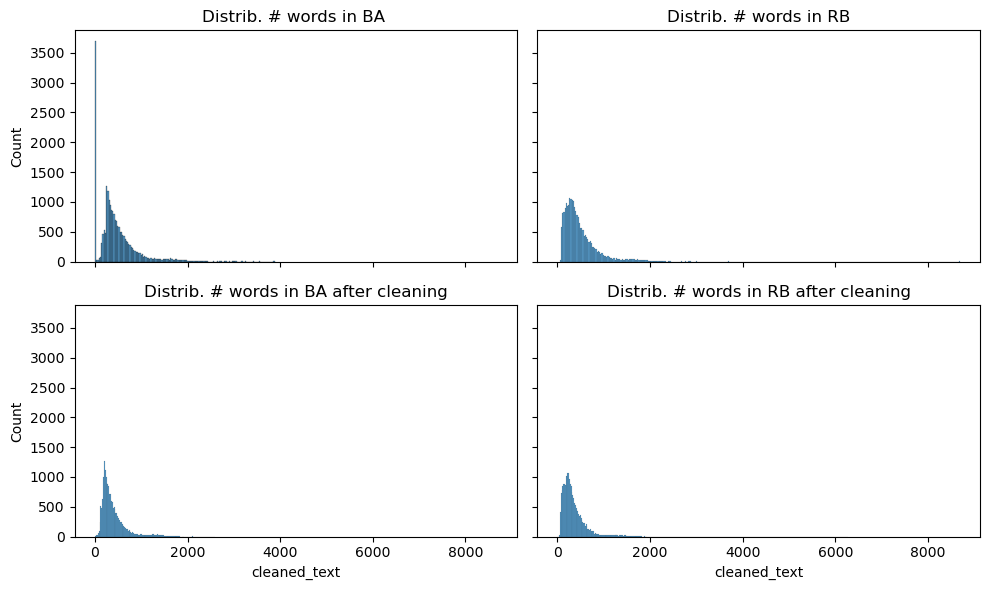

In [217]:
# Before preprocessing of the sentences
mean_words_BA = np.mean(ratings_BA["text"].apply(lambda row : len(str(row))))
mean_words_RB = np.mean(ratings_RB["text.1"].apply(lambda row : len(str(row))))
print(f"Average number of words in textual reviews of BA : {mean_words_BA}")
print(f"Average number of words in textual reviews of RB : {mean_words_RB}")

NaN_sentences_BA = len(ratings_BA[ratings_BA["text"].isnull()])
NaN_sentences_RB = len(ratings_RB[ratings_RB["text.1"].isnull()])
print(f"\nNumber of sentences with NaN/0 words in BA :{NaN_sentences_BA}")
print(f"Number of sentences with NaN/0 words in RB :{NaN_sentences_RB}")

# After preprocessing of the sentences
mean_words_BA = np.mean(ratings_BA_cleaned["cleaned_text"].apply(lambda row : len(str(row))))
mean_words_RB = np.mean(ratings_RB_cleaned["cleaned_text"].apply(lambda row : len(str(row))))
print(f"Average number of words in textual reviews of BA : {mean_words_BA}")
print(f"Average number of words in textual reviews of RB : {mean_words_RB}")

NaN_sentences_BA = len(ratings_BA_cleaned[ratings_BA_cleaned["cleaned_text"].isnull()])
NaN_sentences_RB = len(ratings_RB_cleaned[ratings_RB_cleaned["cleaned_text"].isnull()])
print(f"\nNumber of sentences with NaN/0 words in BA :{NaN_sentences_BA}")
print(f"Number of sentences with NaN/0 words in RB :{NaN_sentences_RB}")

fig, axs = plt.subplots(2,2, figsize=(10,6), sharex = True, sharey = True)
sns.histplot(data = ratings_BA['text'].apply(lambda row : len(str(row))), ax = axs[0,0])
sns.histplot(data = ratings_RB['text.1'].apply(lambda row : len(str(row))), ax = axs[0,1])
sns.histplot(data = ratings_BA_cleaned['cleaned_text'].apply(lambda row : len(str(row))), ax = axs[1,0])
sns.histplot(data = ratings_RB_cleaned['cleaned_text'].apply(lambda row : len(str(row))), ax = axs[1,1])

axs[0,0].set_title("Distrib. # words in BA ")
axs[0,1].set_title("Distrib. # words in RB")
axs[1,0].set_title("Distrib. # words in BA after cleaning")
axs[1,1].set_title("Distrib. # words in RB after cleaning")
plt.tight_layout()
plt.show()

### Top words

In [218]:
ratings_BA_cleaned.head()

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name,cleaned_text
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.80,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel,best 27072016directly reviewed comparison west...
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,True,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong,bottle one pint pub helsinki 2006 vintage orig...
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.68,True,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong,originally rated 16112009 draught pikkulintu 8...
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,4.00,True,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong.608427,tiong,750ml bottle originally rated 1882012bottling ...
5,5.0,4.0,4.0,67932,Cantillon Olutravintola Pikkulintu,388,Brasserie Cantillon,1344074400,4.0,4.5,4.05,True,Lambic - Unblended,4.0,"375ml bottle @ Pikkulintu, Helsinki. Originall...",tiong.608427,tiong,375ml bottle pikkulintu helsinki originally ra...


In [219]:
top_words_BA = compute_top_words(ratings_BA_cleaned)
top_words_RB = compute_top_words(ratings_RB_cleaned)

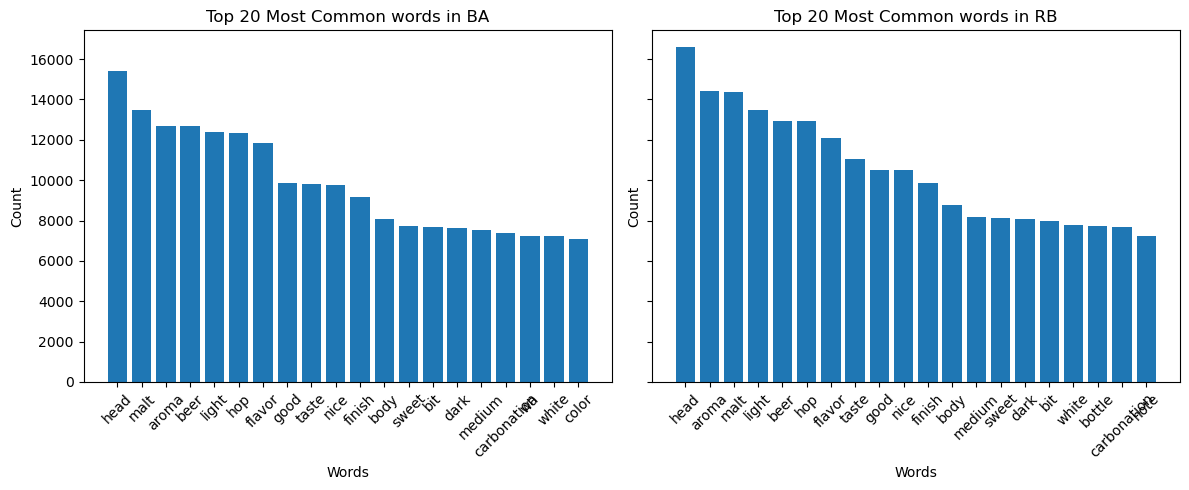

In [220]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey = True)
axs[0].bar(top_words_BA['Word'], top_words_BA['Count'])
axs[1].bar(top_words_RB['Word'], top_words_RB['Count'])

axs[0].set_xlabel("Words")
axs[1].set_xlabel("Words")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")
axs[0].set_title("Top 20 Most Common words in BA")
axs[1].set_title("Top 20 Most Common words in RB")

axs[0].tick_params(axis='x',labelrotation = 45)
axs[1].tick_params(axis='x',labelrotation = 45)
plt.tight_layout()
plt.show()

c:\Users\Maxime\anaconda3\envs\ada\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


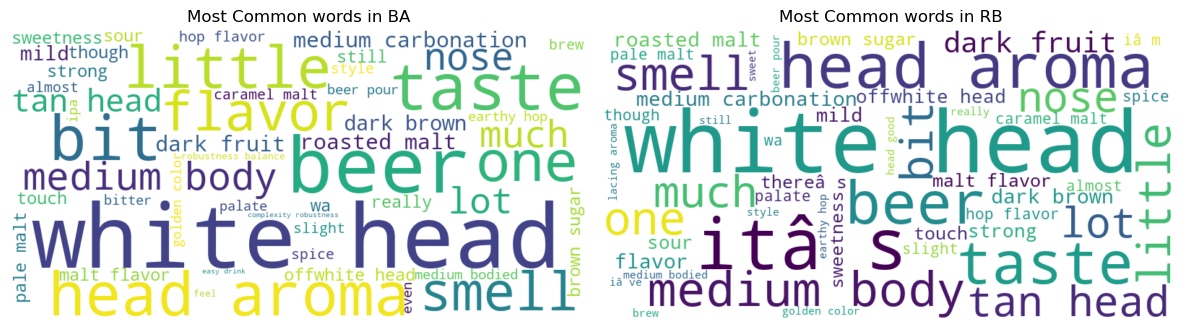

In [222]:
# Plot the distribution of the most common words
all_words_BA = ' '.join(ratings_BA_cleaned['cleaned_text'])
all_words_RB = ' '.join(ratings_RB_cleaned['cleaned_text'])
wordcloud_BA = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(all_words_BA)
wordcloud_RB = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(all_words_RB)

fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].imshow(wordcloud_BA, interpolation='bilinear')
axs[1].imshow(wordcloud_RB, interpolation='bilinear')
axs[0].set_title("Most Common words in BA")
axs[1].set_title("Most Common words in RB")
axs[0].axis('off')
axs[1].axis('off')
plt.tight_layout()
plt.show()

### Sentiment polarity per style of beers

In [223]:
# sort the most common style of beers
ratings_per_style = ratings_BA.groupby('style').apply(lambda x: pd.Series({"count": len(x)})).sort_values(by='count', ascending = False)
ratings_per_style['count_after_cleaning'] = ratings_BA_cleaned.groupby('style').apply(lambda x: len(x)).sort_values(ascending = False)
print(len(ratings_per_style))
ratings_per_style.head()

104


,count,count_after_cleaning
style,,
American IPA,2095,1700
Saison / Farmhouse Ale,1362,1025
American Double / Imperial IPA,1167,924
American Pale Ale (APA),1103,885
American Wild Ale,815,571


In [224]:
# Take only the most popular styles of beers
top_10_styles = list(ratings_per_style.index[:10])
print(top_10_styles)
print(len(ratings_BA))
ratings_per_style_top10 = ratings_BA[ratings_BA['style'].isin(top_10_styles)]
print(len(ratings_per_style_top10))
ratings_per_style_top10.head()

['American IPA', 'Saison / Farmhouse Ale', 'American Double / Imperial IPA', 'American Pale Ale (APA)', 'American Wild Ale', 'American Double / Imperial Stout', 'American Amber / Red Ale', 'American Porter', 'Belgian Strong Pale Ale', 'Fruit / Vegetable Beer']
21964
9305


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name
8,6.5,4.75,4.75,81697,Ann,22511,Hill Farmstead Brewery,1384858800,4.75,4.75,4.75,True,Saison / Farmhouse Ale,4.75,"Bottle at THE Sour and Saison Tasting, London....",leighton.343447,leighton
9,12.0,4.00,4.00,76421,Mornin' Delight,23222,Toppling Goliath Brewing Company,1456830000,4.00,4.00,4.00,True,American Double / Imperial Stout,4.00,Draft. Pours oily black with a creamy brown he...,leighton.343447,leighton
10,9.1,4.75,4.75,237682,Beavertown / Boneyard Bloody Notorious,30471,Beavertown Brewery,1467021600,4.75,4.75,4.75,True,American Double / Imperial IPA,4.75,Keg at the brewery. Pours just slightly hazy y...,leighton.343447,leighton
11,8.2,4.25,4.50,115317,Dinner,20681,Maine Beer Company,1458298800,4.25,4.25,4.41,True,American Double / Imperial IPA,4.50,Bottle shared in London - many thanks to Paul....,leighton.343447,leighton
12,10.0,4.25,4.25,175027,Power Of The Voodoo,30471,Beavertown Brewery,1436436000,4.50,4.25,4.40,True,American Double / Imperial IPA,4.50,Can at home in London - sourced from Ales by M...,leighton.343447,leighton


In [225]:
ratings_BA_cleaned.head(2)

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name,cleaned_text
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.80,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel,best 27072016directly reviewed comparison west...
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,True,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong,bottle one pint pub helsinki 2006 vintage orig...


In [226]:
from textblob import TextBlob

In [240]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

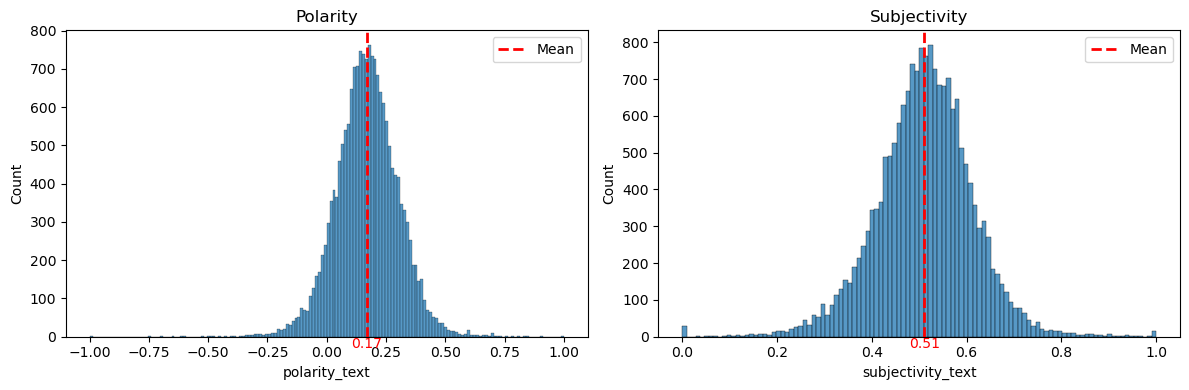

In [255]:
# with original text
warnings.filterwarnings('ignore') # remove the warnings

ratings_BA_cleaned['polarity_text'] = ratings_BA_cleaned['text'].apply(lambda x: getPolarity(x))
ratings_BA_cleaned['subjectivity_text'] = ratings_BA_cleaned['text'].apply(lambda x: getSubjectivity(x))

fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.histplot(data = ratings_BA_cleaned['polarity_text'], ax = axs[0])
sns.histplot(data = ratings_BA_cleaned['subjectivity_text'], ax = axs[1])

axs[0].axvline(ratings_BA_cleaned['polarity_text'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[1].axvline(ratings_BA_cleaned['subjectivity_text'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

axs[0].text(ratings_BA_cleaned["polarity_text"].mean(), 0, ratings_BA_cleaned["polarity_text"].mean().round(2), color='red', ha='center', va='top')
axs[1].text(ratings_BA_cleaned["subjectivity_text"].mean(), 0, ratings_BA_cleaned["subjectivity_text"].mean().round(2), color='red', ha='center', va='top')

axs[0].set_title("Polarity")
axs[1].set_title("Subjectivity")

for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

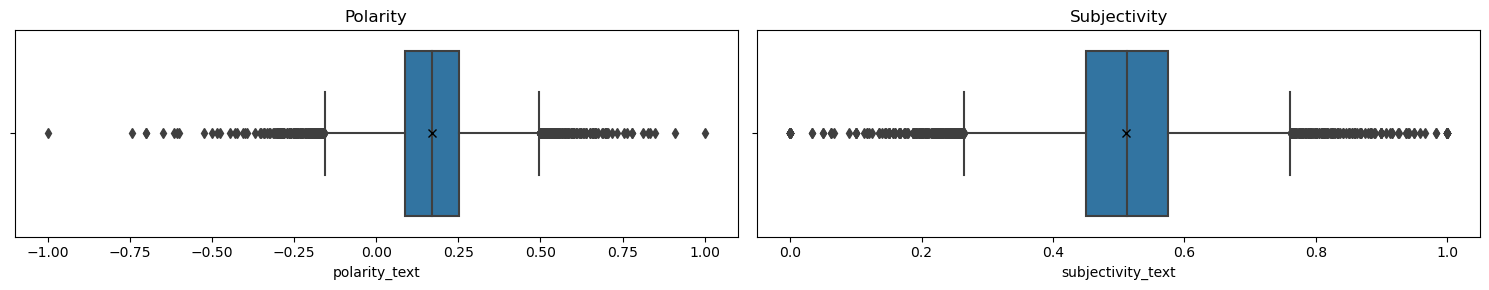

In [423]:
fig, axs = plt.subplots(1,2, figsize=(15, 3))
sns.boxplot(data = ratings_BA_cleaned, x = 'polarity_text', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[0])
sns.boxplot(data = ratings_BA_cleaned, x = 'subjectivity_text', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[1])

axs[0].set_title(f"Polarity")
axs[1].set_title(f"Subjectivity")

plt.tight_layout()
plt.show()

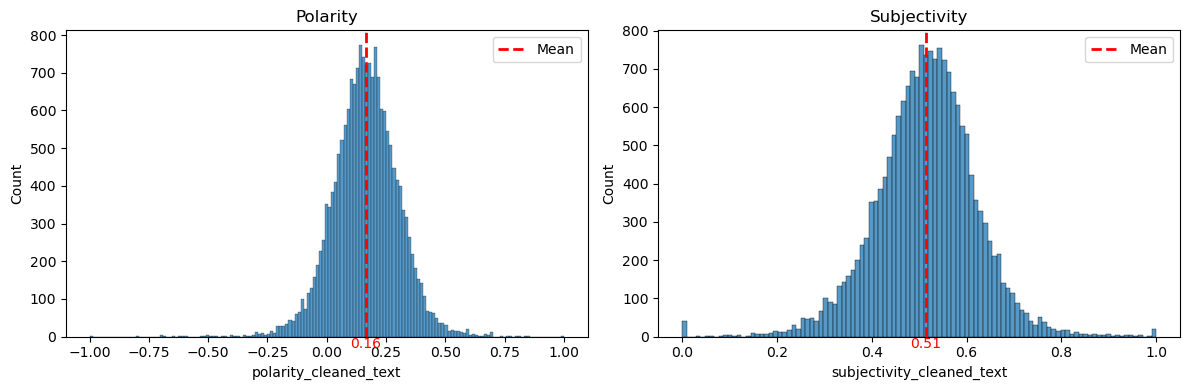

In [256]:
# with cleaned text

ratings_BA_cleaned['polarity_cleaned_text'] = ratings_BA_cleaned['cleaned_text'].apply(lambda x: getPolarity(x))
ratings_BA_cleaned['subjectivity_cleaned_text'] = ratings_BA_cleaned['cleaned_text'].apply(lambda x: getSubjectivity(x))

fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.histplot(data = ratings_BA_cleaned['polarity_cleaned_text'], ax = axs[0])
sns.histplot(data = ratings_BA_cleaned['subjectivity_cleaned_text'], ax = axs[1])

axs[0].axvline(ratings_BA_cleaned['polarity_cleaned_text'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[1].axvline(ratings_BA_cleaned['subjectivity_cleaned_text'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

axs[0].text(ratings_BA_cleaned["polarity_cleaned_text"].mean(), 0, ratings_BA_cleaned["polarity_cleaned_text"].mean().round(2), color='red', ha='center', va='top')
axs[1].text(ratings_BA_cleaned["subjectivity_cleaned_text"].mean(), 0, ratings_BA_cleaned["subjectivity_cleaned_text"].mean().round(2), color='red', ha='center', va='top')

axs[0].set_title("Polarity")
axs[1].set_title("Subjectivity")

for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

### Run a test to show that the distributions are the same and so text cleaning is useless for polarity and subjectivity

In [257]:
ratings_BA_cleaned.head(2)

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,style,taste,text,user_id,user_name,cleaned_text,polarity_text,subjectivity_text,polarity_cleaned_text,subjectivity_cleaned_text
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel,best 27072016directly reviewed comparison west...,0.219485,0.541373,0.234375,0.505208
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong,bottle one pint pub helsinki 2006 vintage orig...,0.172619,0.450000,0.172619,0.450000


Number of different style of beers in BA : 104
Number of different style of beers in RB : 79


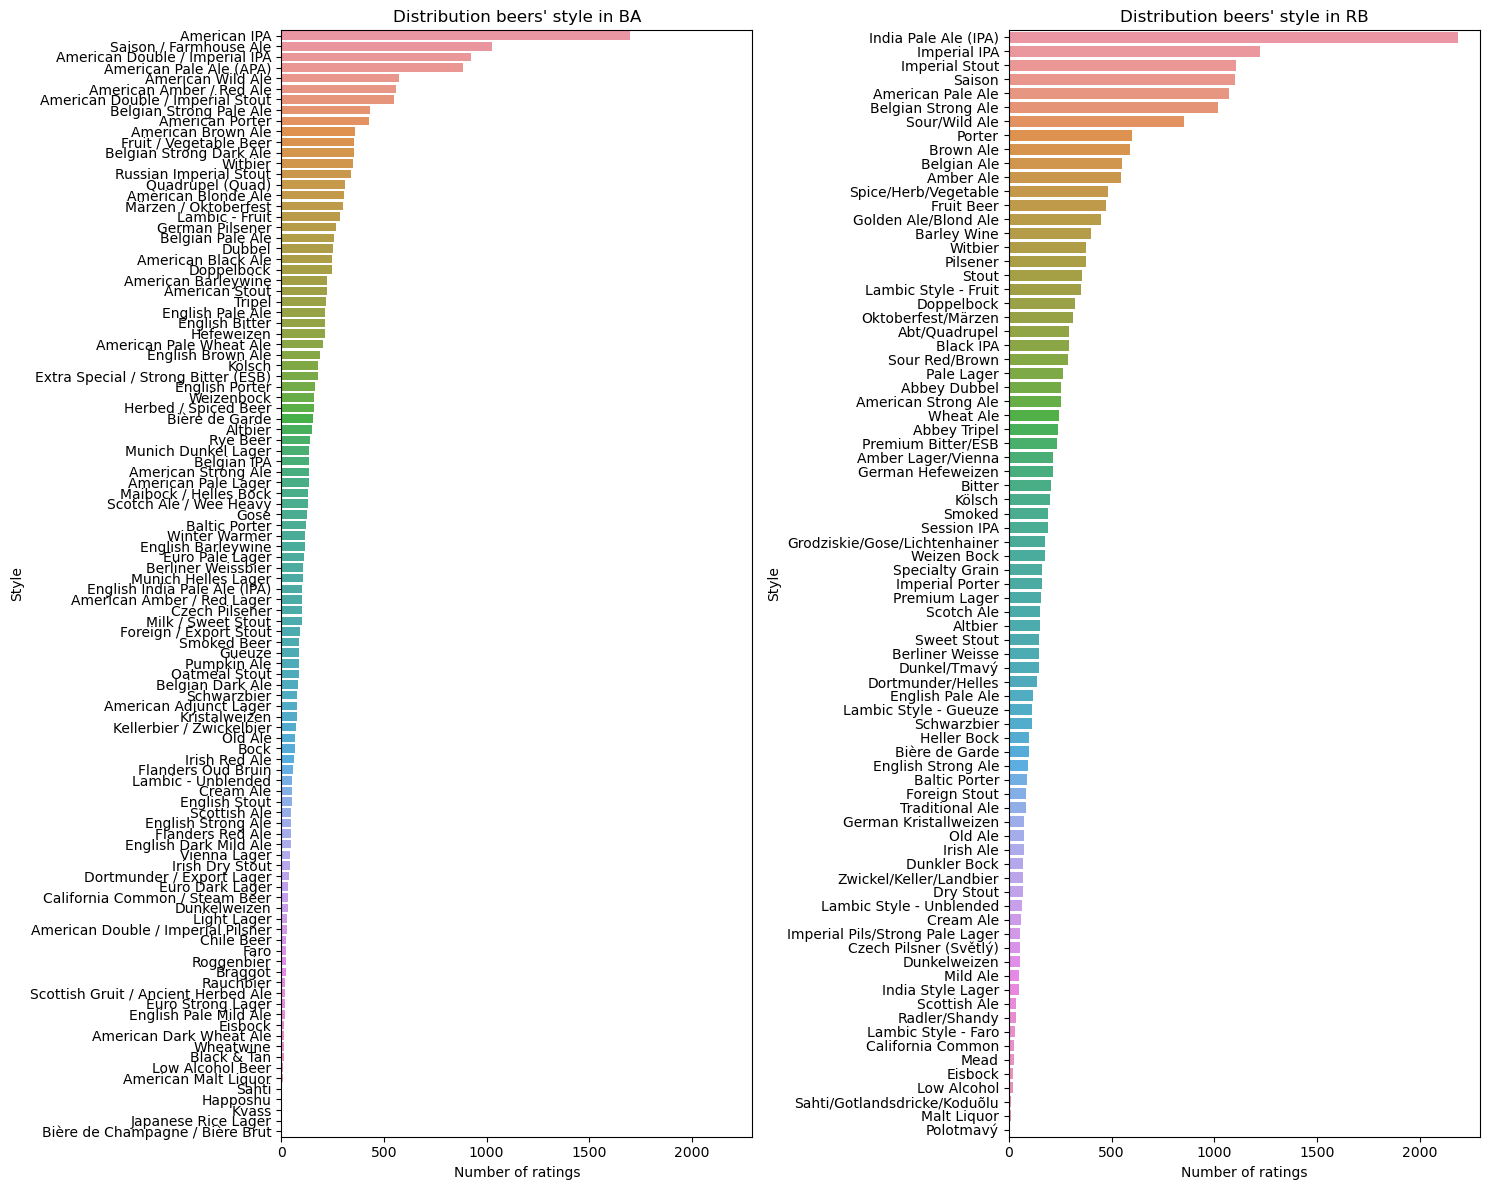

In [285]:
print(f"Number of different style of beers in BA : {len(ratings_BA_cleaned['style'].unique())}")
print(f"Number of different style of beers in RB : {len(ratings_RB_cleaned['style.1'].unique())}")

fig, axs = plt.subplots(1,2, figsize=(15, 12), sharex = True)
sns.countplot(y='style', data=ratings_BA_cleaned, order = ratings_BA_cleaned['style'].value_counts().index,ax = axs[0])
sns.countplot(y='style.1', data=ratings_RB_cleaned, order = ratings_RB_cleaned['style.1'].value_counts().index,ax = axs[1])

axs[0].set_title("Distribution beers' style in BA")
axs[1].set_title("Distribution beers' style in RB")

for ax in axs.flat:
    ax.set_xlabel("Number of ratings")
    ax.set_ylabel("Style")

plt.tight_layout()
plt.show()

Number of different breweries in BA : 1979
Number of different breweries in RB : 2230


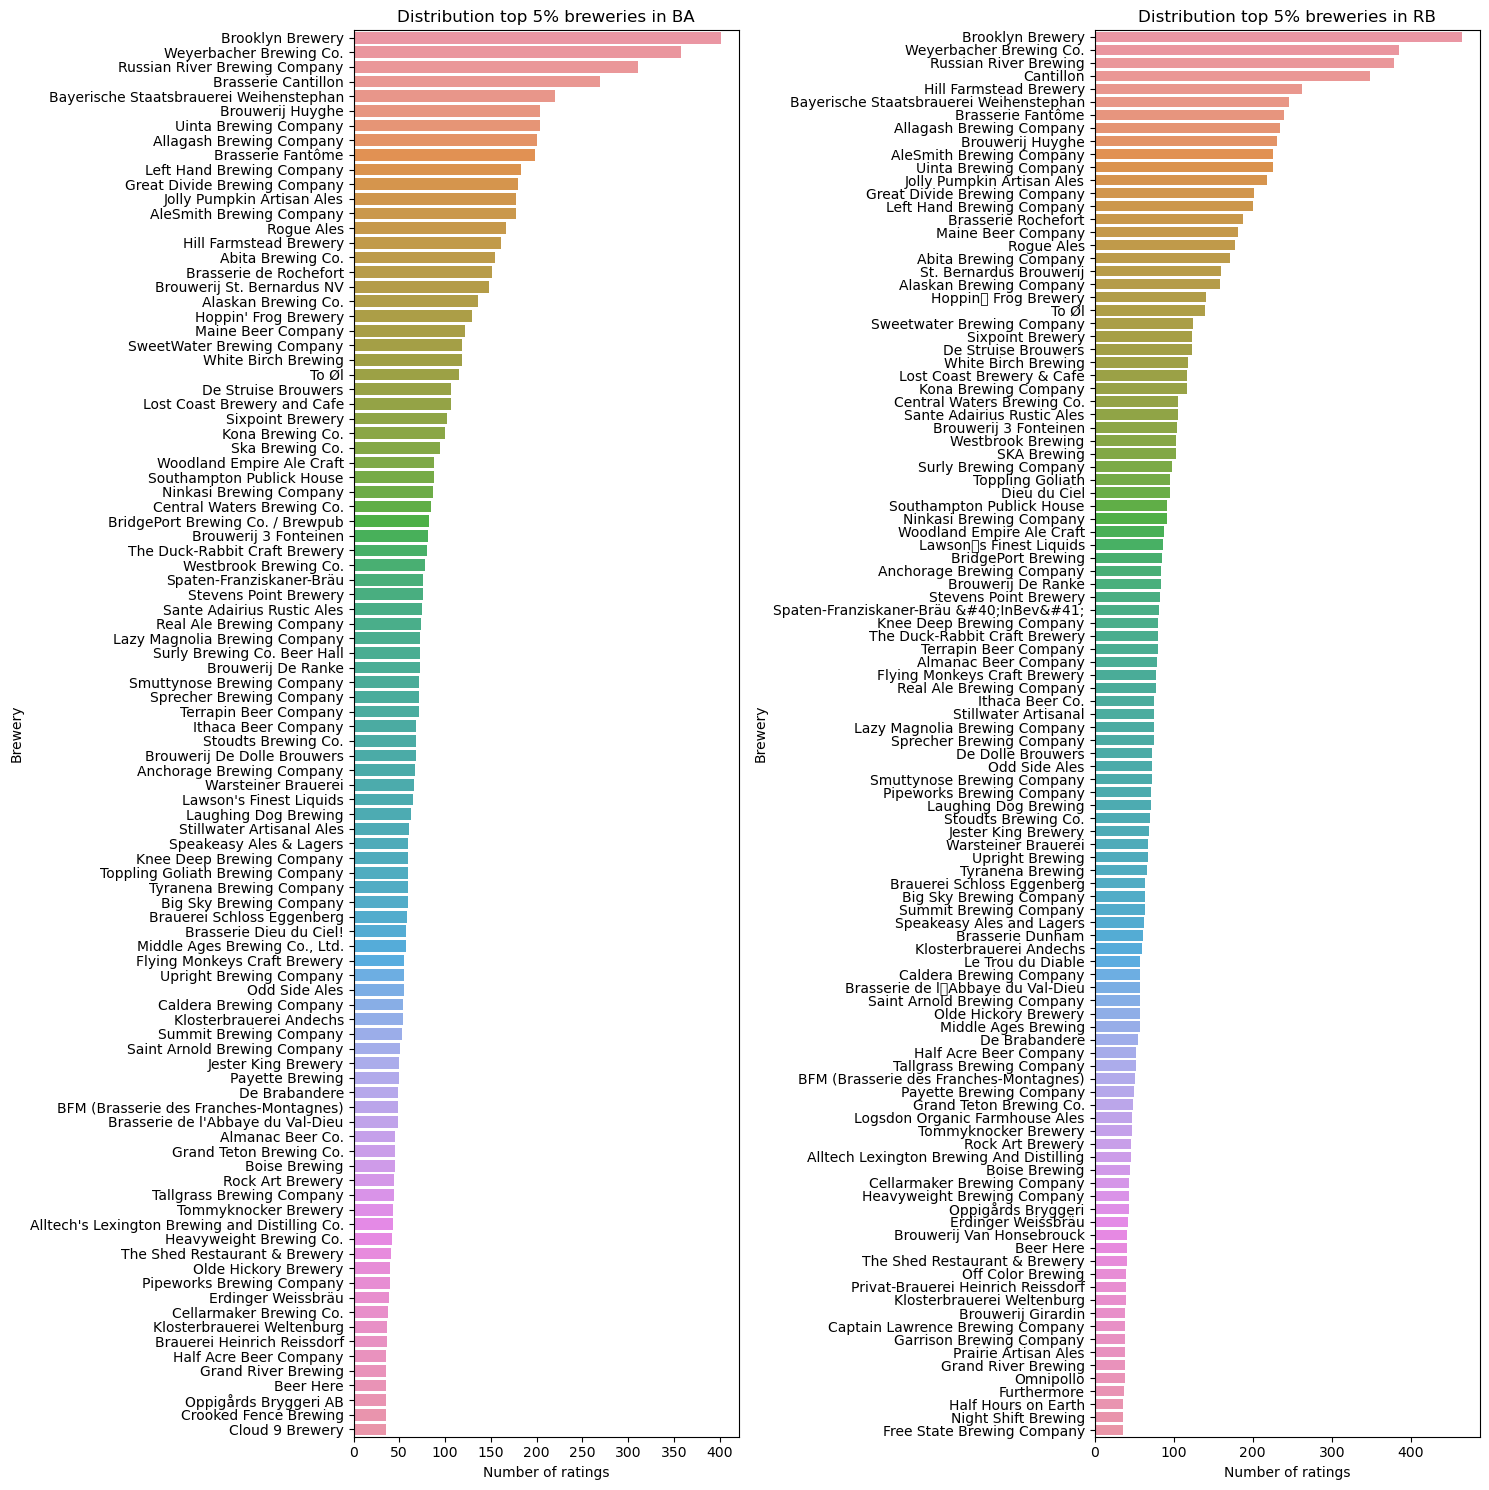

In [413]:
print(f"Number of different breweries in BA : {len(ratings_BA_cleaned['brewery_id'].unique())}")
print(f"Number of different breweries in RB : {len(ratings_RB_cleaned['brewery_id.1'].unique())}")

def filter_topk_breweries(df, k):
    # Find the top k% of breweries most rated
    brewery_count = pd.DataFrame({"count": df.groupby('brewery_name').apply(lambda x: len(x))})
    threshold = brewery_count['count'].quantile(k)
    top_breweries = brewery_count[brewery_count['count'] > threshold].index

    # Filter DataFrame based on the selected brewery names
    df_filtered = df[df['brewery_name'].isin(top_breweries)]
    return df_filtered

ratings_BA_cleaned_copy = ratings_BA_cleaned.copy()
ratings_RB_cleaned_copy = ratings_RB_cleaned.copy().rename(columns = {'brewery_name.1': 'brewery_name'})

ratings_BA_top5_breweries = filter_topk_breweries(ratings_BA_cleaned_copy, 0.95)
ratings_RB_top5_breweries = filter_topk_breweries(ratings_RB_cleaned_copy, 0.95)

fig, axs = plt.subplots(1,2, figsize=(15, 15))
sns.countplot(y='brewery_name', data = ratings_BA_top5_breweries, order = ratings_BA_top5_breweries['brewery_name'].value_counts().index, ax = axs[0])
sns.countplot(y='brewery_name', data = ratings_RB_top5_breweries, order = ratings_RB_top5_breweries['brewery_name'].value_counts().index, ax = axs[1])

axs[0].set_title("Distribution top 5% breweries in BA")
axs[1].set_title("Distribution top 5% breweries in RB")

for ax in axs.flat:
    ax.set_xlabel("Number of ratings")
    ax.set_ylabel("Brewery")

plt.tight_layout()
plt.show()

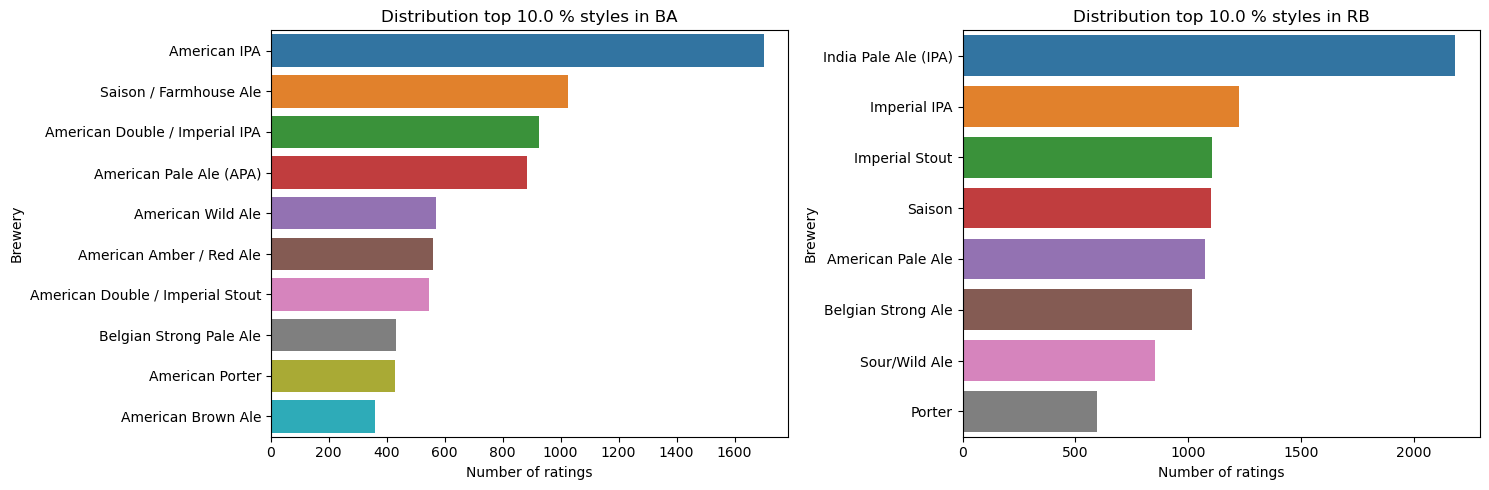

In [401]:
def filter_topk_styles(df, k):
    # Find the top k% of breweries most rated
    style_count = pd.DataFrame({"count": df.groupby('style').apply(lambda x: len(x))})
    threshold = style_count['count'].quantile(k)
    top_styles = style_count[style_count['count'] > threshold].index

    # Filter DataFrame based on the selected brewery names
    df_filtered = df[df['style'].isin(top_styles)]
    return df_filtered

ratings_BA_cleaned_copy = ratings_BA_cleaned.copy()
ratings_RB_cleaned_copy = ratings_RB_cleaned.copy().rename(columns = {'style.1': 'style'})

k = 0.9

ratings_BA_topk_styles = filter_topk_styles(ratings_BA_cleaned_copy, k)
ratings_RB_topk_styles = filter_topk_styles(ratings_RB_cleaned_copy, k)

fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(y='style', data = ratings_BA_topk_styles, order = ratings_BA_topk_styles['style'].value_counts().index, ax = axs[0])
sns.countplot(y='style', data = ratings_RB_topk_styles, order = ratings_RB_topk_styles['style'].value_counts().index, ax = axs[1])

axs[0].set_title(f"Distribution top {np.round(100*(1-k),0)} % styles in BA")
axs[1].set_title(f"Distribution top {np.round(100*(1-k),0)} % styles in RB")

for ax in axs.flat:
    ax.set_xlabel("Number of ratings")
    ax.set_ylabel("Brewery")

plt.tight_layout()
plt.show()

## Distribution of Polarity/subjectivity per brewery in BA

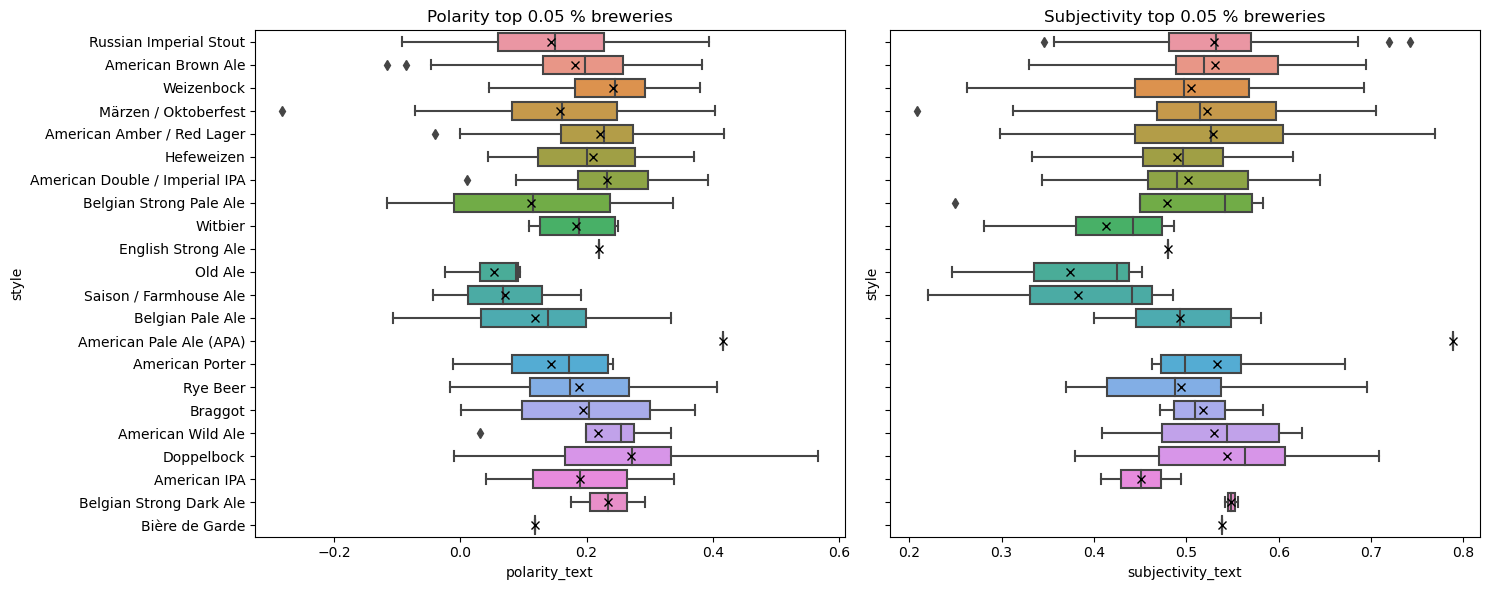

In [431]:
k_breweries = 0.9995
ratings_BA_topk_breweries = filter_topk_breweries(ratings_BA_cleaned_copy, k_breweries)

fig, axs = plt.subplots(1,2, figsize=(15, 6), sharey = True)
sns.boxplot(data = ratings_BA_topk_breweries, x = 'polarity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[0])
sns.boxplot(data = ratings_BA_topk_breweries, x = 'subjectivity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[1])

axs[0].set_title(f"Polarity top {np.round(100*(1-k_breweries),3)} % breweries")
axs[1].set_title(f"Subjectivity top {np.round(100*(1-k_breweries),3)} % breweries")

plt.tight_layout()
plt.show()

## Distribution of Polarity/subjectivity per style in BA

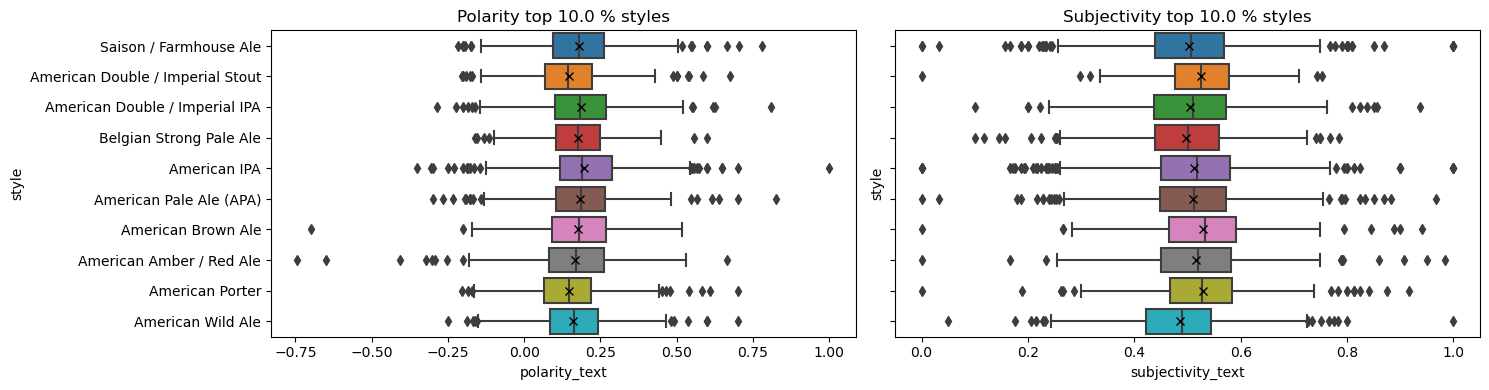

In [436]:
k_styles = 0.9
ratings_BA_topk_styles = filter_topk_styles(ratings_BA_cleaned_copy, k_styles)

fig, axs = plt.subplots(1,2, figsize=(15, 4), sharey = True)
sns.boxplot(data = ratings_BA_topk_styles, x = 'polarity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[0])
sns.boxplot(data = ratings_BA_topk_styles, x = 'subjectivity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[1])

axs[0].set_title(f"Polarity top {np.round(100*(1-k_styles),0)} % styles")
axs[1].set_title(f"Subjectivity top {np.round(100*(1-k_styles),0)} % styles")

plt.tight_layout()
plt.show()

### All styles in BA (ugly)

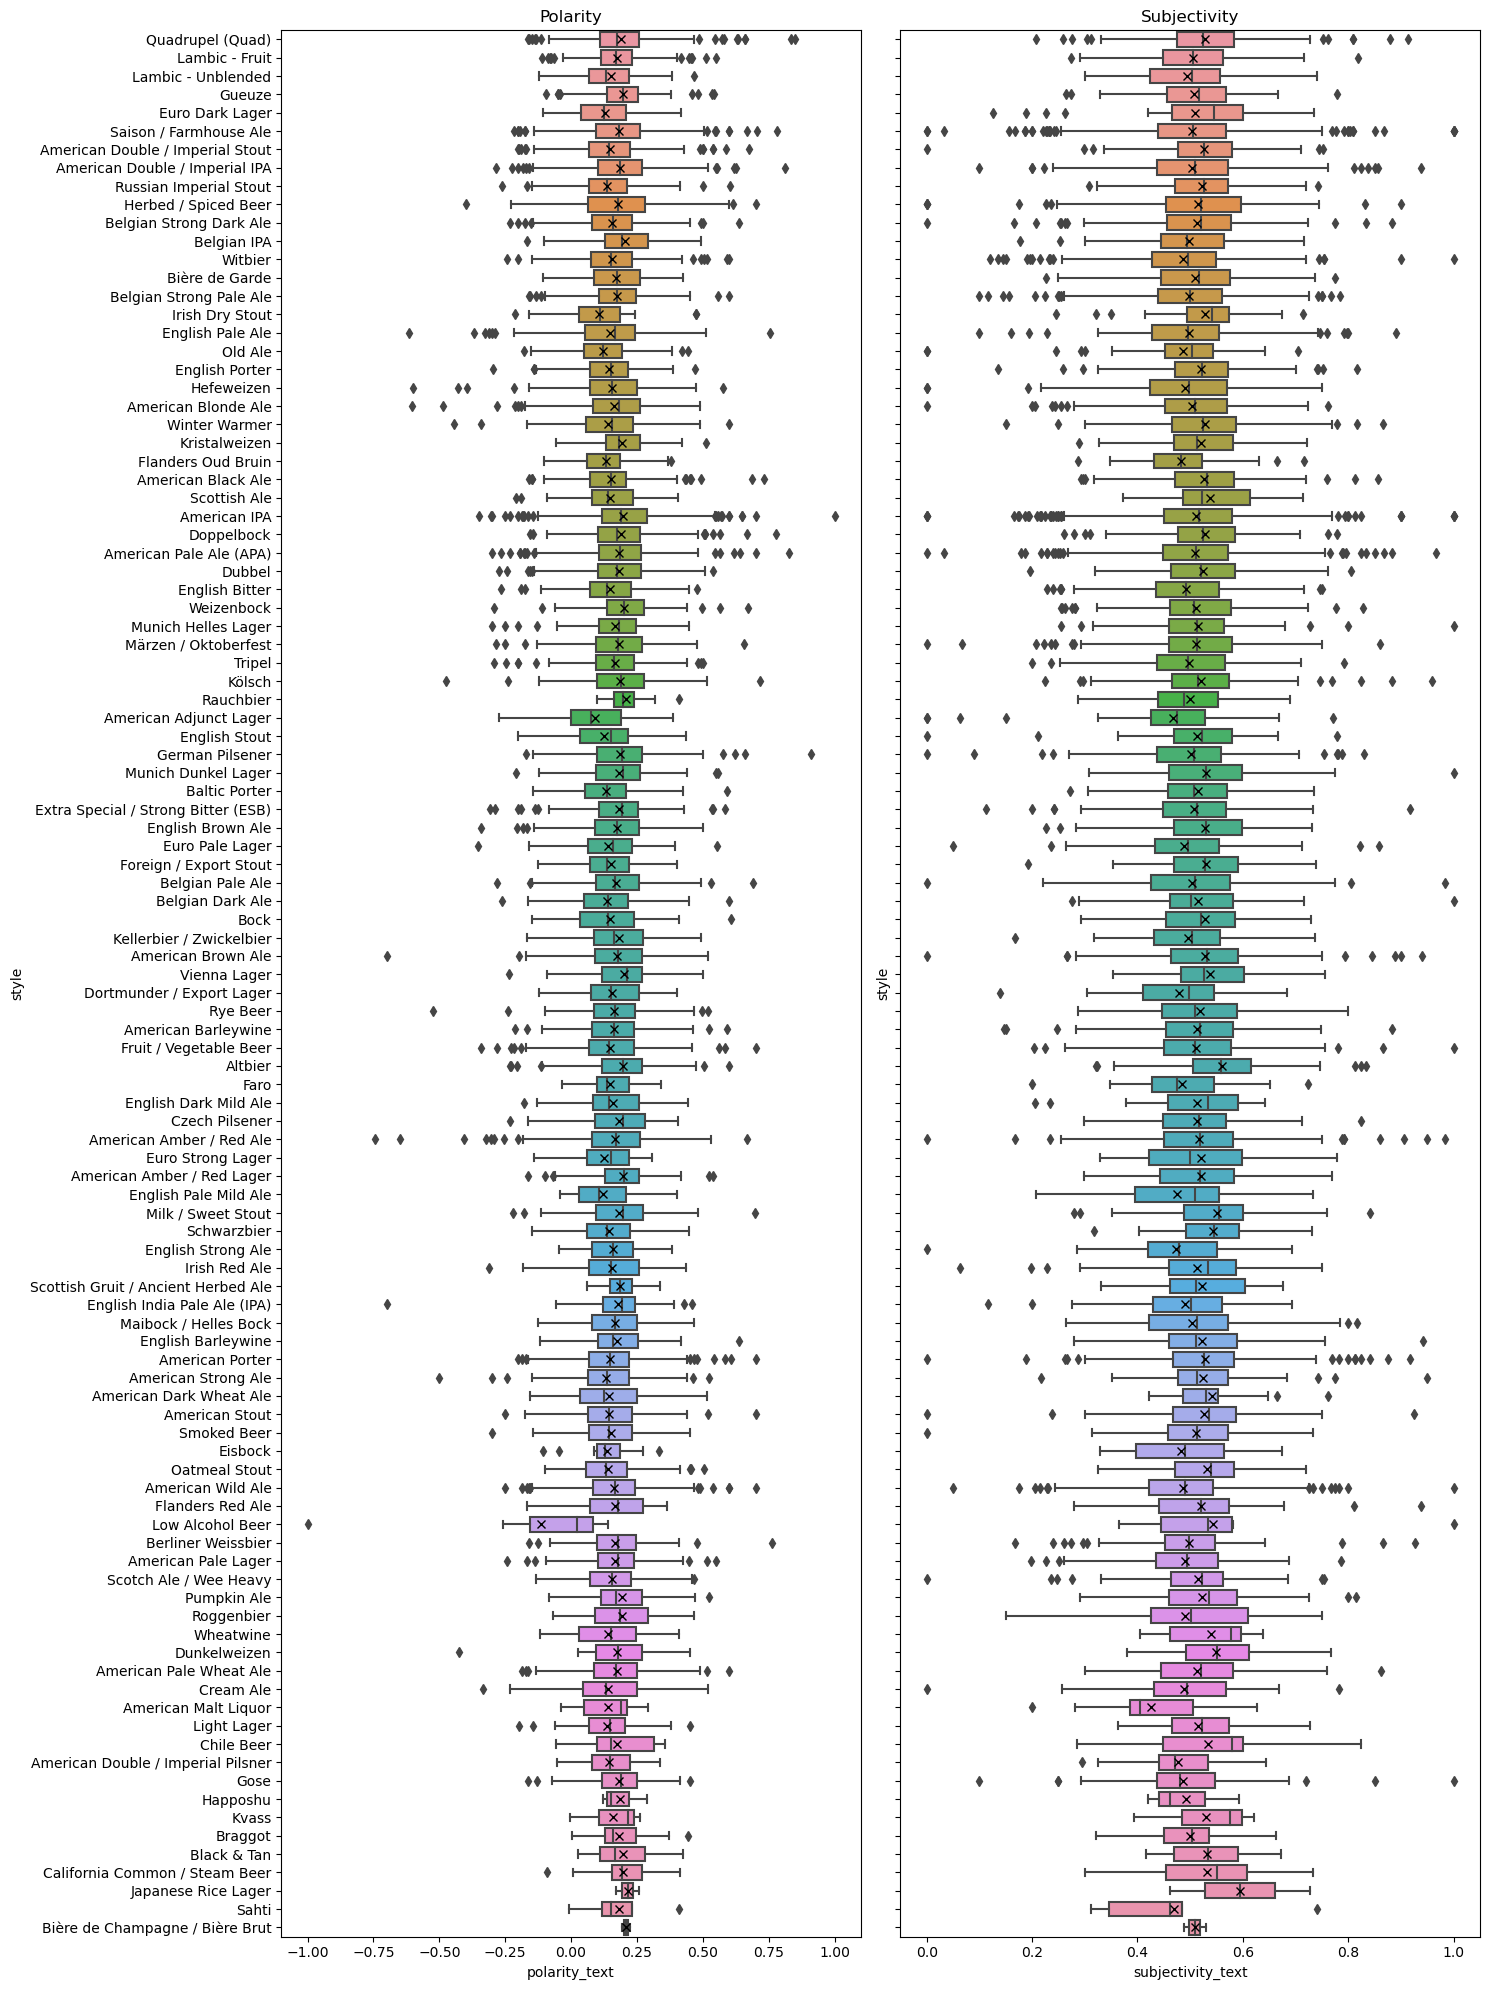

In [426]:
fig, axs = plt.subplots(1,2, figsize=(15, 20), sharey  = True)
sns.boxplot(data = ratings_BA_cleaned, x = 'polarity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[0])
sns.boxplot(data = ratings_BA_cleaned, x = 'subjectivity_text', y = 'style', showmeans=True, meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black"}, ax = axs[1])

axs[0].set_title(f"Polarity")
axs[1].set_title(f"Subjectivity")

plt.tight_layout()
plt.show()

ranking:
- entre ratings et text
- entre les 2 sites

- How to make ranking system more fair with sentiment analysis ?
    - find a pondération system
    - comparison on brewery level
    - comparison on beer style level
- Which external factors influence the most the ranking system (political data, temporal data with seasons, economic situation with census dataset) ?
- From all that, what is the best brewery in the world ?


Worldwide : RateBeer
USA : BeerAdvocate
A voir si on garde les deux sites ou si on fait une combinaison

TODO
- distrib of sentiment polarity --> textblob [-1,1]
    - in general
    - per brewery
    - per style of beer

- distrib of sentiment subjectivity --> textblob [0,1]
    - in general
    - per brewery
    - per style of beer

- TODO 2: 
    - order boxplot in the same order than distrib of counts to see if the most rated are the most appreciated
    - create custom color on boxplot to identify the styles with greatest polarity/subjectivity (green to red)
    - have descriptive statistics (numbers); not only plots